<a href="https://colab.research.google.com/github/mkbharati/Bank-management-System/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

### Importing Data

In [ ]:
stock_price = pd.read_excel("/content/drive/MyDrive/Minor_Project/1613615-Stock_Price_data_set.xlsx")
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


### Exploring Data

In [ ]:
stock_price.shape

(1009, 7)

In [ ]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [ ]:
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
stock_price.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
stock_price.duplicated().sum()

0

In [ ]:
stock_price.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

### Handling Outliers

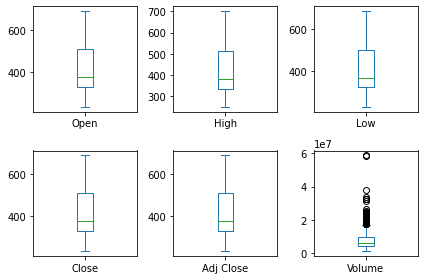

In [ ]:
plt.subplot(2,3,1)
stock_price['Open'].plot(kind='box')

plt.subplot(2,3,2)
stock_price['High'].plot(kind='box')

plt.subplot(2,3,3)
stock_price['Low'].plot(kind='box')

plt.subplot(2,3,4)
stock_price['Close'].plot(kind='box')

plt.subplot(2,3,5)
stock_price['Adj Close'].plot(kind='box')

plt.subplot(2,3,6)
stock_price['Volume'].plot(kind='box')
plt.tight_layout()

### Handling Outliers in Volume

In [ ]:
def find_outliers_limit(col_name):
    Q1, Q3 = stock_price[col_name].quantile([0.25,0.75])
    IQR = Q3-Q1
    low = Q1-(1.5*IQR)
    high = Q3+(1.5*IQR)
    return (high,low)
high_vol, low_vol = find_outliers_limit('Volume')
print('Volume: ','Upper_limit: ', high_vol)
stock_price.loc[stock_price['Volume']>high_vol, 'Volume']=high_vol

Volume:  Upper_limit:  17168150.0


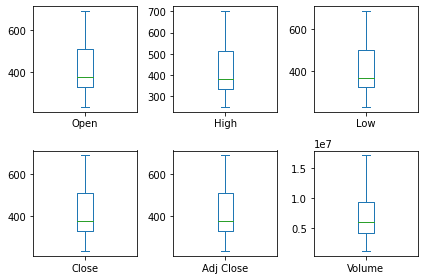

In [ ]:
plt.subplot(2,3,1)
stock_price['Open'].plot(kind='box')

plt.subplot(2,3,2)
stock_price['High'].plot(kind='box')

plt.subplot(2,3,3)
stock_price['Low'].plot(kind='box')

plt.subplot(2,3,4)
stock_price['Close'].plot(kind='box')

plt.subplot(2,3,5)
stock_price['Adj Close'].plot(kind='box')

plt.subplot(2,3,6)
stock_price['Volume'].plot(kind='box')

plt.tight_layout()

### Data Visualisation


In [ ]:
stock_price['month'] = stock_price['Date'].astype('string')
stock_price['month']=stock_price['month'].apply(lambda x:x.split('-')[1])
stock_price


,Date,Open,High,Low,Close,Adj Close,Volume,month
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0,02
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0,02
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0,02
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0,02
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0,02
...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,17168150.0,01
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,17168150.0,02
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000.0,02
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200.0,02


In [ ]:
highlowmon = stock_price.groupby('month')[['Volume']].sum().sort_values('Volume',ascending=False).rename(columns={'Volume':'MonthlyQuantity'})
highlowmon

,MonthlyQuantity
month,
10,782125400.0
01,747454950.0
04,725818850.0
07,723275600.0
03,690296750.0
06,543325150.0
09,540690350.0
02,539145350.0
11,527079600.0


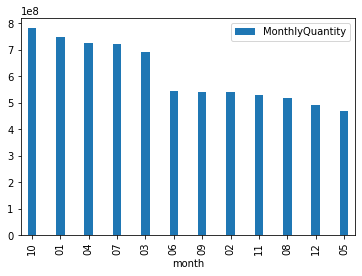

In [ ]:
highlowmon.plot(kind = 'bar',width = 0.3)

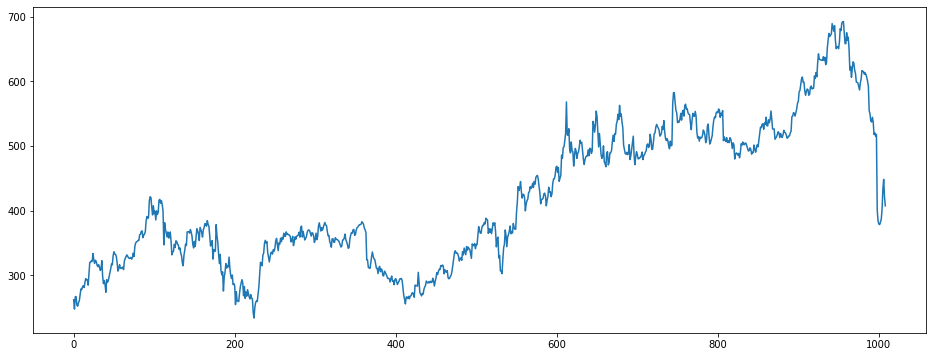

In [ ]:
stock_price['Open'].plot(figsize=(16,6))

In [ ]:
stock_price.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume,month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,258.091426,264.432859,249.881426,257.190000,257.190000,1.072530e+07,2.000000
7,257.872855,264.715718,251.352853,258.867144,258.867144,1.059329e+07,2.000000
8,261.062855,266.687145,254.585711,260.945714,260.945714,1.033099e+07,2.000000
9,262.798573,268.045713,256.208570,262.939998,262.939998,1.023540e+07,2.000000


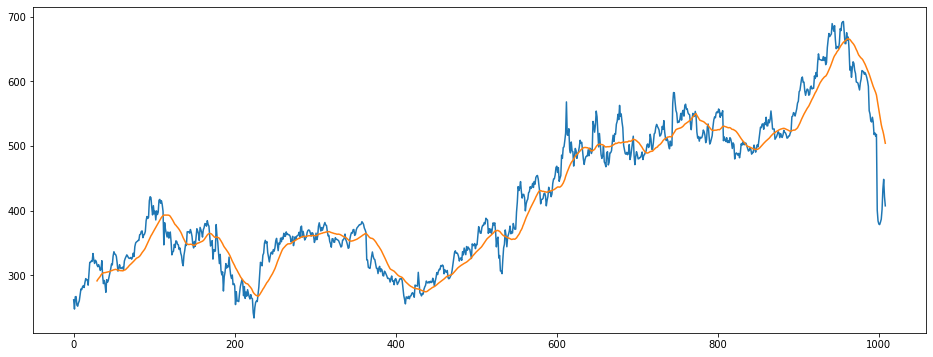

In [ ]:
stock_price['Open'].plot(figsize=(16,6))
stock_price.rolling(window=30).mean()['Close'].plot()

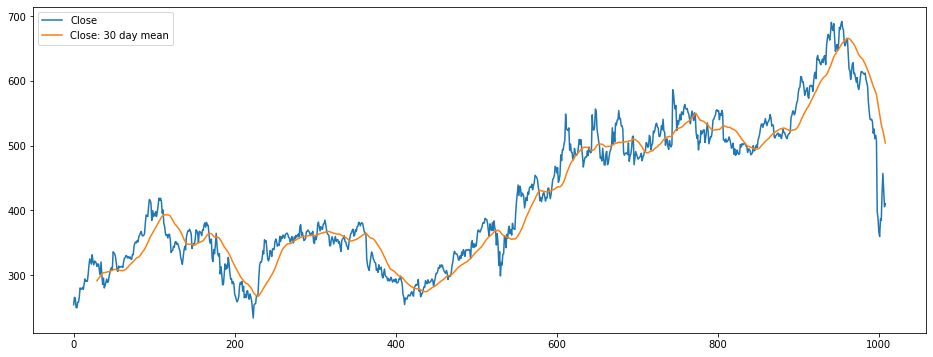

In [ ]:
stock_price['Close: 30 day mean']=stock_price['Close'].rolling(window=30).mean()
stock_price[['Close','Close: 30 day mean']].plot(figsize=(16,6))

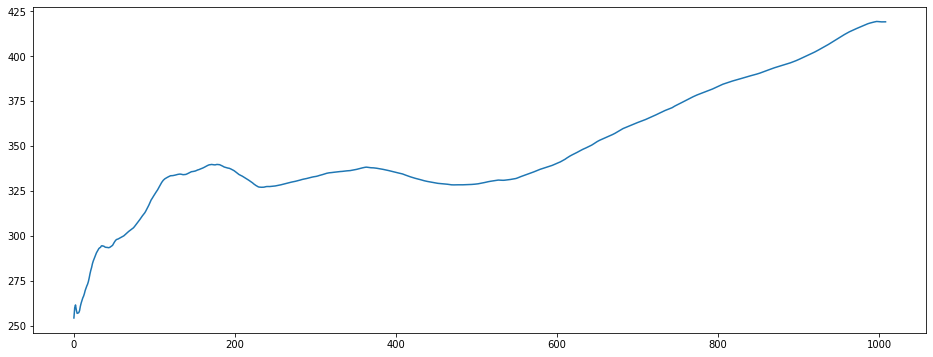

In [ ]:
stock_price['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [ ]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(stock_price['Open'],random_state = 0)
training_set = pd.DataFrame(training_set)
training_set

,Open
810,506.760010
2,266.579987
481,326.779999
477,332.959991
308,373.679993
...,...
835,504.010010
192,312.899994
629,508.679993
559,425.000000


Modelling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60,756):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0]),
X_train, y_train = np.array(X_train),np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))


In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
22/22 [==============================] - 10s 125ms/step - loss: 0.0858
Epoch 2/100
22/22 [==============================] - 3s 124ms/step - loss: 0.0593
Epoch 3/100
22/22 [==============================] - 3s 123ms/step - loss: 0.0589
Epoch 4/100
22/22 [==============================] - 3s 128ms/step - loss: 0.0601
Epoch 5/100
22/22 [==============================] - 3s 125ms/step - loss: 0.0585
Epoch 6/100
22/22 [==============================] - 3s 123ms/step - loss: 0.0579
Epoch 7/100
22/22 [==============================] - 3s 127ms/step - loss: 0.0601
Epoch 8/100
22/22 [==============================] - 3s 125ms/step - loss: 0.0596
Epoch 9/100
22/22 [==============================] - 3s 127ms/step - loss: 0.0590
Epoch 10/100
22/22 [==============================] - 3s 127ms/step - loss: 0.0585
Epoch 11/100
22/22 [==============================] - 3s 148ms/step - loss: 0.0588
Epoch 12/100
22/22 [==============================] - 3s 125ms/step - loss: 0.0583
Epoch 13/100

In [ ]:
test_set = pd.DataFrame(test_set)
inputs = sc.transform(test_set)
X_test = []
for i in range(60,253):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [ ]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       193 non-null    float32
dtypes: float32(1)
memory usage: 900.0 bytes


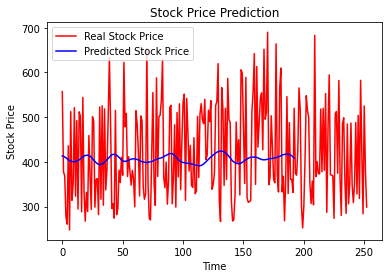

In [ ]:
real = test_set.values
plt.plot(test_set, color='red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()